In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
%run Flightprice_alg_investigation.ipynb
from sklearn.model_selection import learning_curve

/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
def grid_search_hyper_params(X_train, y_train):
    
    # Defining parameter range for a Decision Tree Regressor
    param_grid = {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'random_state': [42]
    }

    print("Training ...")
    grid = GridSearchCV(DecisionTreeRegressor(), 
                        param_grid, 
                        return_train_score=True,
                        refit=True, 
                        verbose=3,
                        n_jobs=-1,  # Use all available cores
                        cv=3) 

    # Fitting the model for grid search 
    grid.fit(X_train, y_train) 

    # Print best parameters after tuning 
    print("Grid searching is done!")
    print("The best score: ", grid.best_score_)
    print("The best hyperparameters:")
    print(grid.best_params_)
    
    return grid

def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), title='Learning Curve'):
   
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def main():
    

    # Grid search for the best hyperparameters
    final_model = grid_search_hyper_params(Xtrain_prepared, ytrain_prepared)
    
    # Plot learning curve
    
    plot_learning_curve(final_model, Xtrain_prepared, ytrain_prepared)
    
    # Evaluate the final model on the development set
    dev_predictions = final_model.predict(Xdev_prepared)
    dev_rmse = mean_squared_error(ydev_prepared, dev_predictions, squared=False)
    
    # Evaluate the final model on the test set
    test_predictions = final_model.predict(Xtest_prepared)
    test_rmse = mean_squared_error(ytest_prepared, test_predictions, squared=False)
    
    print("Development RMSE: ", dev_rmse)
    print("Test RMSE: ", test_rmse)
    # Assuming `ytest_prepared.mean()` gives the mean of the target variable in the test set
    print("Error rate (%): ", 100 * test_rmse / np.mean(ytest_prepared))

Training ...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Grid searching is done!
The best score:  0.9988059401541864
The best hyperparameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 42}
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END max_depth=None, min_samples_leaf=2, min_samples_split=2,

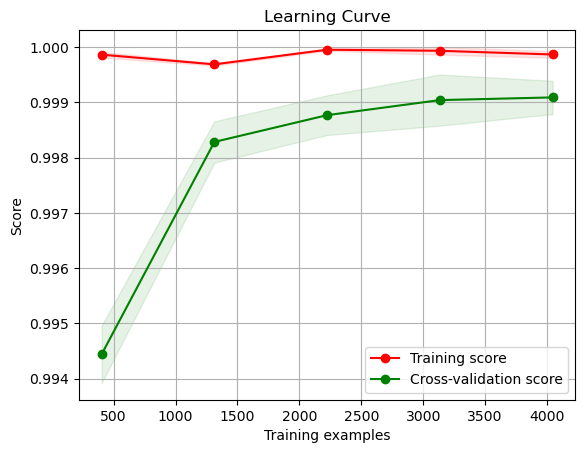

In [14]:
main()

In [ ]:
# The error rate of Decision Tree is 17.06%. The training and cross validation score converge 
# at the sample size around 4000, so more data would not help much. Instead we should 
# improve on algorithm, or process columns that we drop due to complex format